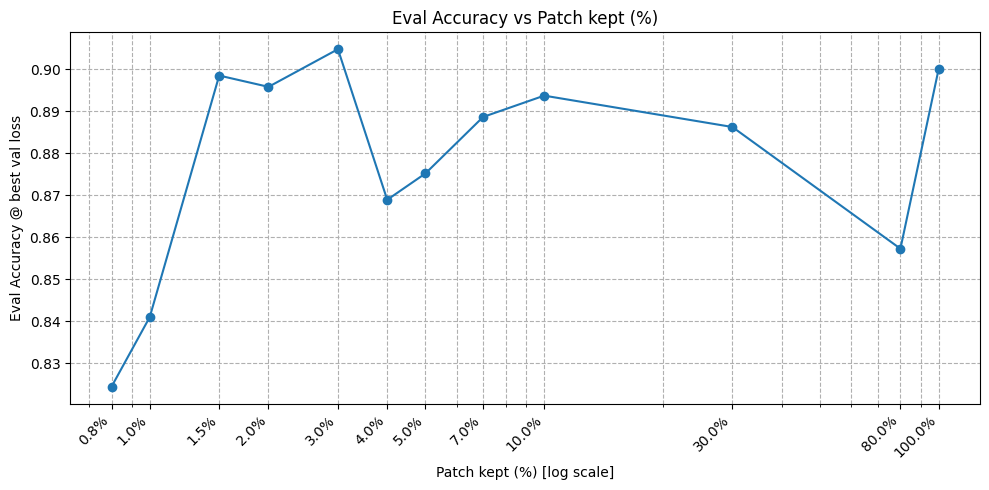

In [8]:
import wandb
import re
import matplotlib.pyplot as plt
import numpy as np

# Inizializza l'API W&B
api = wandb.Api()

# Nome del progetto W&B
project_name = "vit-ucb-pruning3"
entity_name = 'vincenzo-civale-universi-degli-studi-di-firenze'  # se non hai entity, lascia None

# Lista di run
runs = api.runs(f"{entity_name}/{project_name}" if entity_name else project_name)

kept_values = []
accuracies = []

for run in runs:
    run_name = run.name
    match = re.search(r"UCB-(\d*\.?\d+)", run_name)
    if match:
        kept_percent = float(match.group(1)) * 100
       
        # scarica l’history (solo le colonne che servono)
        history = run.history(keys=["eval/loss", "eval/accuracy"], pandas=True)

        if not history.empty and "eval/loss" in history:
            # step con loss più bassa
            best_idx = history["eval/loss"].idxmin()
            acc = history.loc[best_idx, "eval/accuracy"]

            kept_values.append(kept_percent)
            accuracies.append(acc)

# ➕ Aggiungo manualmente la baseline: 100% patch mantenute, acc = 0.90
kept_values.append(100.0)
accuracies.append(0.90)

# Ordina i dati
kept_values, accuracies = zip(*sorted(zip(kept_values, accuracies)))

plt.figure(figsize=(10,5))
plt.plot(kept_values, accuracies, marker='o', label="Runs")
plt.xscale("log")  # <-- scala logaritmica sulle x
plt.xlabel("Patch kept (%) [log scale]")
plt.ylabel("Eval Accuracy @ best val loss")
plt.title("Eval Accuracy vs Patch kept (%)")
plt.grid(True, which="both", ls="--")

plt.xticks(kept_values, [f"{v:.1f}%" for v in kept_values], rotation=45, ha='right')


plt.tight_layout()
plt.show()
